# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ecuaciones de una recta en el plano $\overline{x_1, x_2}$
Sea $v = (v_1, v_2)$ el vector director de la recta con pendiente  $ \quad m = v_2/v_1.$
- **Ec. Implícita**, con pendiente $m$ y corte en $x_2=b$ cuando $x_1=0$ es $$x_2 = m x_1 + b.$$
- **Ec. Explícita** a partir de la Implícita es $$m x_1 - x_2 + b = 0.$$

A partir de la Explícita podemos obtener el vector característico $(w_1,w_2)$, que es perpendicular a la recta, simplemente mirando los coeficientes que acompañan a $x_1$ y $x_2$ respectivamente. Así formamos el array 
${\bf w} = (w_0, w_1, w_2)$ tal que
$$w_0 = b \quad,\quad w_1 = m = v_2/v_1 \quad,\quad w_2 = -1,$$
que coincide con el array de pesos del clasificador lineal $$ \hat y = f({\bf x},{\bf w}) = w_0 + w_1x_1 + w_2x_2.$$

In [2]:
#- Parámetros de la recta = superficie de decisión del clasificador
b = 2.
v = [3., 1.]

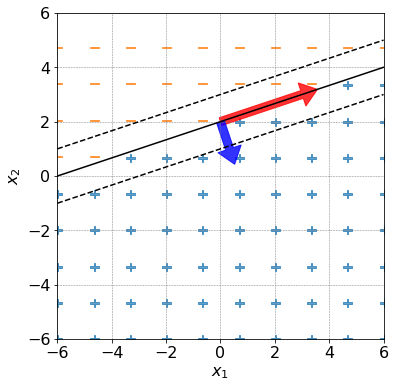

In [25]:
def classifier(X, w):
    return np.matmul(w[1:].T, X) + w[0]

def implicit(x1,w):
    return w[1]*x1 + w[0]

#%% ------------------------------------------
m = v[1]/v[0]
w = [b, m, -1.]
v = np.expand_dims(v , axis=1)
w = np.expand_dims(w , axis=1)
#%% ------------------------------------------

Ns = 10
bounds = 6
rangeX0 = np.linspace(-bounds, bounds, Ns)
rangeX1 = np.linspace(-bounds, bounds, Ns)
[XX0, XX1] = np.meshgrid(rangeX0, rangeX1)
X0 = np.expand_dims(XX0.ravel(), axis=0)
X1 = np.expand_dims(XX1.ravel(), axis=0)
X = np.vstack((X0,X1))

yhat = classifier(X, w)

#%% ------------------------------------------

flag_arrows  = True
flag_margins = True
fontsize = 16

plt.rcParams['figure.figsize'] = [6,6] #<- this makes the figures larger in Jupyter 

plt.scatter(X0[yhat>0], X1[yhat>0], marker='$+$', s=99, alpha=0.7)
plt.scatter(X0[yhat<0], X1[yhat<0], marker='$-$', s=99, alpha=0.7)
plt.plot(rangeX0, implicit(rangeX0, w), 'k' )

if flag_margins:
    w_above = w  + [[1],[0],[0]]
    w_below = w  + [[-1],[0],[0]]
    plt.plot(rangeX0, implicit(rangeX0, w_above), '--k')
    plt.plot(rangeX0, implicit(rangeX0, w_below), '--k')
    
if flag_arrows:
    plt.arrow(0, b, float(v[0]), float(v[1]), 
              width=.3, head_length=.6, alpha=0.8, color='r' )
    plt.arrow(0, b, float(w[1]), float(w[2]), 
              width=.3, head_length=.6, alpha=0.8, color='b' )
plt.axis('scaled')
plt.axis([-bounds,bounds,-bounds,bounds])
plt.xlabel('$x_1$', fontsize=fontsize) 
plt.xticks(fontsize=fontsize); 
plt.ylabel('$x_2$', fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid(c='gray', linewidth=.5, linestyle='--')
plt.show()